# Finance Fraudulent Transaction

## Import Library

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv , set_option
from pandas.plotting import scatter_matrix

## Load Dataset

In [4]:
df=pd.read_csv("/creditcard.csv")

In [6]:
import warnings
warnings.filterwarnings("ignore") #Suppresses all warnings

## EDA

In [33]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,51591.00,51591.00,5.16e+04,51591.00,51591.00,51591.00,51591.00,51591.00,51591.00,5.16e+04,...,51591.00,51591.00,51591.00,5.16e+04,51591.00,51591.00,5.16e+04,5.16e+04,51591.00,5.16e+04
mean,29408.89,-0.24,3.89e-03,0.69,0.18,-0.26,0.10,-0.12,0.05,1.08e-01,...,-0.03,-0.11,-0.04,7.99e-03,0.14,0.02,4.14e-03,3.99e-03,94.01,2.91e-03
std,13196.05,1.89,1.64e+00,1.50,1.40,1.41,1.31,1.28,1.22,1.21e+00,...,0.73,0.64,0.59,5.96e-01,0.44,0.50,3.90e-01,3.32e-01,253.52,5.38e-02
min,0.00,-56.41,-7.27e+01,-32.97,-5.17,-42.15,-26.16,-26.55,-41.48,-9.28e+00,...,-20.26,-8.59,-26.75,-2.84e+00,-7.50,-1.58,-8.57e+00,-9.62e+00,0.00,0.00e+00
25%,22655.50,-0.99,-5.70e-01,0.22,-0.72,-0.87,-0.63,-0.61,-0.15,-6.23e-01,...,-0.23,-0.53,-0.18,-3.22e-01,-0.13,-0.33,-6.35e-02,-6.74e-03,7.68,0.00e+00
50%,33767.00,-0.25,7.57e-02,0.79,0.19,-0.29,-0.15,-0.08,0.06,-4.82e-04,...,-0.07,-0.08,-0.05,6.26e-02,0.17,-0.07,8.87e-03,2.22e-02,25.34,0.00e+00
75%,39498.00,1.15,7.31e-01,1.43,1.07,0.28,0.50,0.42,0.33,8.01e-01,...,0.11,0.31,0.08,4.02e-01,0.42,0.30,8.33e-02,7.62e-02,86.16,0.00e+00
max,45026.00,1.96,1.82e+01,4.10,16.49,34.80,22.53,36.68,20.01,1.04e+01,...,22.61,5.81,17.30,4.01e+00,5.53,3.52,1.11e+01,3.38e+01,12910.93,1.00e+00


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51591 entries, 0 to 51590
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    51591 non-null  int64  
 1   V1      51591 non-null  float64
 2   V2      51591 non-null  float64
 3   V3      51591 non-null  float64
 4   V4      51591 non-null  float64
 5   V5      51591 non-null  float64
 6   V6      51591 non-null  float64
 7   V7      51591 non-null  float64
 8   V8      51591 non-null  float64
 9   V9      51591 non-null  float64
 10  V10     51591 non-null  float64
 11  V11     51591 non-null  float64
 12  V12     51591 non-null  float64
 13  V13     51591 non-null  float64
 14  V14     51591 non-null  float64
 15  V15     51591 non-null  float64
 16  V16     51591 non-null  float64
 17  V17     51591 non-null  float64
 18  V18     51591 non-null  float64
 19  V19     51591 non-null  float64
 20  V20     51591 non-null  float64
 21  V21     51591 non-null  float64
 22

In [7]:
set_option('display.width' ,100)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,...,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000
mean,29408.888120,-0.244221,0.003887,0.691974,0.183611,-0.259039,0.104715,-0.120474,0.054468,0.108449,...,-0.028862,-0.106634,-0.039418,0.007995,0.135556,0.020305,0.004140,0.003987,94.014363,0.002908
std,13196.047307,1.887998,1.641193,1.498371,1.398830,1.413486,1.312673,1.278442,1.216566,1.208872,...,0.732046,0.636907,0.592622,0.595768,0.438858,0.500884,0.389621,0.332373,253.518524,0.053844
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,22655.500000,-0.993823,-0.570329,0.215237,-0.723584,-0.871680,-0.634868,-0.606774,-0.146407,-0.622868,...,-0.230767,-0.528352,-0.178719,-0.322127,-0.128074,-0.330665,-0.063502,-0.006740,7.680000,0.000000
50%,33767.000000,-0.246892,0.075692,0.793662,0.190588,-0.290140,-0.150447,-0.077622,0.059086,-0.000482,...,-0.067054,-0.081866,-0.051550,0.062606,0.174933,-0.072844,0.008875,0.022241,25.345000,0.000000
75%,39498.000000,1.154831,0.731302,1.429386,1.066994,0.282184,0.495847,0.424977,0.333436,0.800723,...,0.108996,0.307826,0.078873,0.401672,0.421984,0.299365,0.083277,0.076230,86.160000,0.000000
max,45026.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [9]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51586,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51589,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
#cont null  value
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [47]:
df.fillna(0,inplace=True)

In [48]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [22]:

pd.set_option('display.precision',2)


In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,51591.00,51591.00,5.16e+04,51591.00,51591.00,51591.00,51591.00,51591.00,51591.00,5.16e+04,...,51591.00,51591.00,51591.00,5.16e+04,51591.00,51591.00,5.16e+04,5.16e+04,51591.00,5.16e+04
mean,29408.89,-0.24,3.89e-03,0.69,0.18,-0.26,0.10,-0.12,0.05,1.08e-01,...,-0.03,-0.11,-0.04,7.99e-03,0.14,0.02,4.14e-03,3.99e-03,94.01,2.91e-03
std,13196.05,1.89,1.64e+00,1.50,1.40,1.41,1.31,1.28,1.22,1.21e+00,...,0.73,0.64,0.59,5.96e-01,0.44,0.50,3.90e-01,3.32e-01,253.52,5.38e-02
min,0.00,-56.41,-7.27e+01,-32.97,-5.17,-42.15,-26.16,-26.55,-41.48,-9.28e+00,...,-20.26,-8.59,-26.75,-2.84e+00,-7.50,-1.58,-8.57e+00,-9.62e+00,0.00,0.00e+00
25%,22655.50,-0.99,-5.70e-01,0.22,-0.72,-0.87,-0.63,-0.61,-0.15,-6.23e-01,...,-0.23,-0.53,-0.18,-3.22e-01,-0.13,-0.33,-6.35e-02,-6.74e-03,7.68,0.00e+00
50%,33767.00,-0.25,7.57e-02,0.79,0.19,-0.29,-0.15,-0.08,0.06,-4.82e-04,...,-0.07,-0.08,-0.05,6.26e-02,0.17,-0.07,8.87e-03,2.22e-02,25.34,0.00e+00
75%,39498.00,1.15,7.31e-01,1.43,1.07,0.28,0.50,0.42,0.33,8.01e-01,...,0.11,0.31,0.08,4.02e-01,0.42,0.30,8.33e-02,7.62e-02,86.16,0.00e+00
max,45026.00,1.96,1.82e+01,4.10,16.49,34.80,22.53,36.68,20.01,1.04e+01,...,22.61,5.81,17.30,4.01e+00,5.53,3.52,1.11e+01,3.38e+01,12910.93,1.00e+00


In [24]:
df.describe().T ## T for transpose

,count,mean,std,min,25%,50%,75%,max
Time,51591.0,2.94e+04,13196.05,0.00,2.27e+04,3.38e+04,39498.00,45026.00
V1,51591.0,-2.44e-01,1.89,-56.41,-9.94e-01,-2.47e-01,1.15,1.96
V2,51591.0,3.89e-03,1.64,-72.72,-5.70e-01,7.57e-02,0.73,18.18
V3,51591.0,6.92e-01,1.50,-32.97,2.15e-01,7.94e-01,1.43,4.10
V4,51591.0,1.84e-01,1.40,-5.17,-7.24e-01,1.91e-01,1.07,16.49
V5,51591.0,-2.59e-01,1.41,-42.15,-8.72e-01,-2.90e-01,0.28,34.80
V6,51591.0,1.05e-01,1.31,-26.16,-6.35e-01,-1.50e-01,0.50,22.53
V7,51591.0,-1.20e-01,1.28,-26.55,-6.07e-01,-7.76e-02,0.42,36.68
V8,51591.0,5.45e-02,1.22,-41.48,-1.46e-01,5.91e-02,0.33,20.01
V9,51591.0,1.08e-01,1.21,-9.28,-6.23e-01,-4.82e-04,0.80,10.39


In [25]:
class_names = {0 : 'Not Fraud' , 1 : 'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    51441
Fraud          150
Name: count, dtype: int64


## Model Training

In [26]:
from sklearn.model_selection import train_test_split
y = df["Class"]
X = df.loc[:, df.columns != 'Class']
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 1 / 3 , random_state = 42 ) ## stratify sed for suffling t data

In [36]:
from sklearn.metrics import accuracy_score

#import library
from sklearn.linear_model import LogisticRegression

#Intialize the logistics Regression Classifer
logisreg = LogisticRegression()

#train the model
logisreg.fit(X_train , y_train)

#prediciton using test data
y_pred = logisreg.predict(X_test)

acc_logisreg = round(accuracy_score(y_test , y_pred) * 100 , 2)
print("Accuracy of Logitcs Regression model :" , acc_logisreg)

Accuracy of Logitcs Regression model : 99.83


In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()

#train the model
model.fit(X_train , y_train)

#prediciton using test data
y_pred = model.predict(X_test)

acc_lda = round(accuracy_score(y_test , y_pred) * 100 , 2)
print("Accuracy of Linear Discriminant :" , acc_lda)

Accuracy of Linear Discriminant : 99.89


In [38]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

#train the model
model.fit(X_train , y_train)

#prediciton using test data
y_pred = model.predict(X_test)

acc_gu = round(accuracy_score(y_test , y_pred) * 100 , 2)
print("Accuracy of GaussianNB :" , acc_gu)

Accuracy of GaussianNB : 98.4


In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

#train the model
model.fit(X_train , y_train)

#prediciton using test data
y_pred = model.predict(X_test)

acc_gu = round(accuracy_score(y_test , y_pred) * 100 , 2)
print("Accuracy of Decision Tree :" , acc_gu)

Accuracy of Decision Tree : 99.9


In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

#train the model
model.fit(X_train , y_train)

#prediciton using test data
y_pred = model.predict(X_test)

acc_gu = round(accuracy_score(y_test , y_pred) * 100 , 2)
print("Accuracy of Random Forest :" , acc_gu)

Accuracy of Random Forest : 99.94


In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

#train the model
model.fit(X_train , y_train)

#prediciton using test data
y_pred = model.predict(X_test)

acc_gu = round(accuracy_score(y_test , y_pred) * 100 , 2)
print("Accuracy of KNN Classifier :" , acc_gu)

Accuracy of KNN Classifier : 99.7


In [44]:
data = {
    "Model Name": ["Linear Discriminant", "GaussianNB", "Decision Tree", "Random Forest", "KNN Classifier","Logitcs Regression"],
    "Accuracy": [99.89, 98.4, 99.9, 99.94, 99.7, 99.83]
}

## Finding Best Model Performance

In [45]:
# Create a DataFrame
dataframe = pd.DataFrame(data)

# Sort the DataFrame by accuracy in descending order
sorted_df = dataframe.sort_values(by="Accuracy", ascending=False)

# Print the sorted DataFrame
print(sorted_df)

            Model Name  Accuracy
3        Random Forest     99.94
2        Decision Tree     99.90
0  Linear Discriminant     99.89
5   Logitcs Regression     99.83
4       KNN Classifier     99.70
1           GaussianNB     98.40


## Model Evaluation

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[17145,     0],
       [   51,     1]])

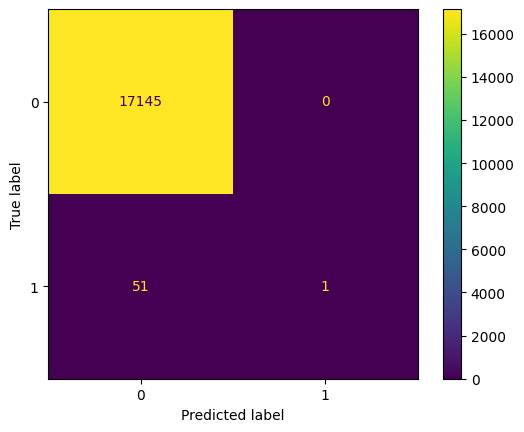

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm).plot()